In [14]:
import numpy as np

class L1_Regularized_Linear_Regression:
    def __init__(self,learning_rate = 0.01, epochs=100, l1 = 0.0):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.l1 = l1
        self.weights = None
        self.bias = 0.0

    def _loss(self,y,y_pred):
        mse = np.mean((y - y_pred) ** 2)
        l1_penalty = self.l1 * np.sum(np.abs(self.weights))
        #l2_penalty = self.l2 * np.sum(self.weights ** 2)
        return mse + l1_penalty
    
    def fit(self, X:np.array, y:np.array):
        n_samples , features = X.shape
        self.weights = np.zeros(features)
        self.bias = 0.0

        for _ in range(self.epochs):
            y_pred = X @ self.weights + self.bias 
            error = y - y_pred
            
            # Gradients 
            dw = -(2 / n_samples) * (X.T @ error) + self.l1 * np.sign(self.weights)
            db = -(2 / n_samples) * np.sum(error)

            self.weights -= dw * self.learning_rate
            self.bias -= db * self.learning_rate

    def predict(self,X):
        return X @ self.weights + self.bias 

In [15]:
# Create synthetic dataset
np.random.seed(0) 
X = np.random.rand(100, 2) 
true_w = np.array([3.0, -1.5]) 
y = X @ true_w + 4 + np.random.randn(100) * 0.2

X.shape,y.shape,true_w

((100, 2), (100,), array([ 3. , -1.5]))

In [16]:
# Train with both L1
model = L1_Regularized_Linear_Regression(l1=0.05)
model.fit(X,y)
print("Weights:", model.weights) 
print("Bias:", model.bias) 
print("First 5 predictions:", model.predict(X[:5]))

Weights: [1.82007109 1.04811353]
Bias: 3.078055330313837
First 5 predictions: [4.82653457 4.74622696 4.52610754 4.80917451 5.2338803 ]


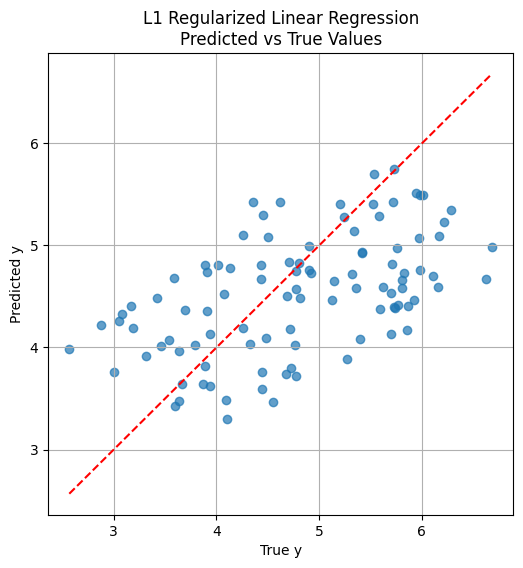

In [17]:
import matplotlib.pyplot as plt

# Get predictions for all points
y_pred = model.predict(X)

# Scatter plot: true vs predicted
plt.figure(figsize=(6,6))
plt.scatter(y, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # perfect-fit line
plt.xlabel("True y")
plt.ylabel("Predicted y")
plt.title("L1 Regularized Linear Regression\nPredicted vs True Values")
plt.grid(True)
plt.show()
